In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

In [ ]:
df = pd.read_csv('merge_all_fix_4.csv')
# merge_brown spot_leaf blast.csv

# Eksploratory data analysis

In [ ]:
df.head()


,product_id,product_link,kegunaan,nama,Unnamed: 4,rating,harga,berat,tempat,image_src
0,1653403927-69,https://www.tokopedia.com/arsyla-store27/filia...,Leaf Blast,filia 525se 250ml fungisida obat hawar daun da...,32.0,4.7,103000,300 Gram,Kab. Probolinggo,https://images.tokopedia.net/img/cache/100-squ...
1,1653404248-71,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,Leaf Blast,DITHANE M-45 80 WP 200 GRAM KEMASAN PABRIK FUN...,154.0,5.0,35000,300 Gram,Jakarta Barat,https://images.tokopedia.net/img/cache/100-squ...
2,1653400654-63,https://www.tokopedia.com/mitratanibwi/fungisi...,Leaf Blast,Fungisida FILIA 525SE 250ML,9.0,5.0,130000,350 Gram,Kab. Banyuwangi,https://images.tokopedia.net/img/cache/100-squ...
3,1653400015-62,https://www.tokopedia.com/priagungjaya/fungisi...,Leaf Blast,fungisida FILIA 525SE 250ML,NaN,NaN,127000,400 Gram,Kab. Bekasi,https://images.tokopedia.net/img/cache/100-squ...
4,1653397693-58,https://www.tokopedia.com/tokosuksestani/fungi...,Leaf Blast,Fungisida sistemik FILIA 525SE penyakit blast ...,1.0,5.0,34000,150 Gram,Kab. Kediri,https://images.tokopedia.net/img/cache/100-squ...


In [ ]:
# rating distribution
# df['rating'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(10,5))

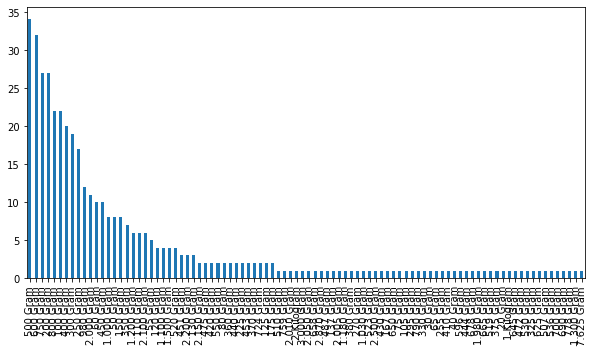

In [ ]:
# berat distribution
df['berat'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(10,5))

In [ ]:
# kegunaan distribution
# df['ulasan'].value_counts().plot(x='ulasan', y='count', kind='bar')

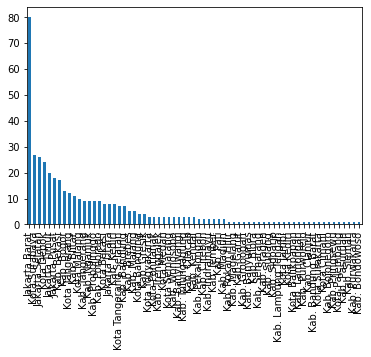

In [ ]:
# kegunaan tempat
df['tempat'].value_counts().plot(x='tempat', y='count', kind='bar')

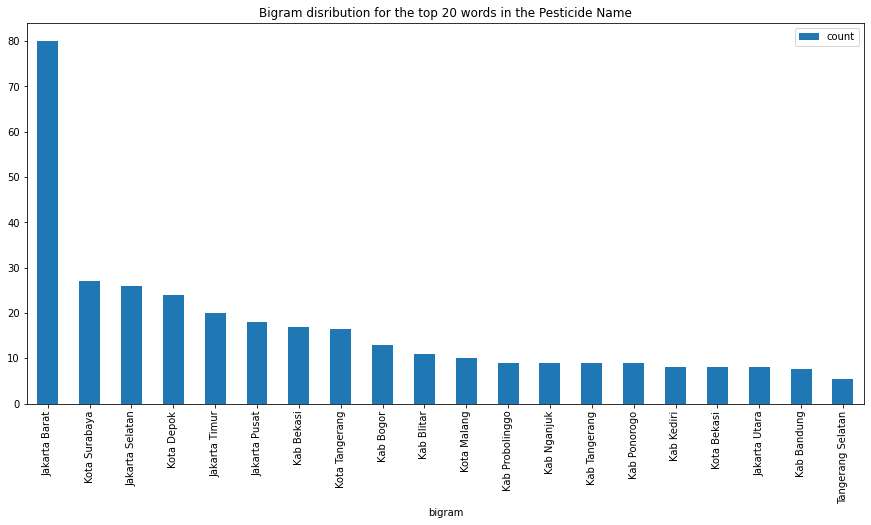

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['tempat'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the Pesticide Name", figsize = (15,7), )

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# # Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# # Function for converting into lower case
# def make_lower_case(text):
#     return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['nama'].apply(_removeNonAscii)
# df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [ ]:
def print_description_clean(index):
    example = df[df.index == index][['cleaned_desc', 'nama', 'tempat']].values[0]
    # print(example)
    if len(example) > 0:
        print(example[0])
        print('Nama:', example[1])
        print('Alamat:', example[2])
print_description_clean(111)
print_description_clean(14)

Insektisida sankill 590 EC 400 ml Obat pembasmi walang sangit
Nama: Insektisida sankill 590 EC 400 ml || Obat pembasmi walang sangit
Alamat: Kab. Jember
Filia 525SE 250ml Obat Hawar Daun dan Blast ORI
Nama: Filia 525SE 250ml Obat Hawar Daun dan Blast ORI
Alamat: Jakarta Selatan


In [ ]:
df['cleaned_desc']

0      filia 525se 250ml fungisida obat hawar daun da...
1      DITHANE M 45 80 WP 200 GRAM KEMASAN PABRIK FUN...
2                            Fungisida FILIA 525SE 250ML
3                            fungisida FILIA 525SE 250ML
4      Fungisida sistemik FILIA 525SE penyakit blast ...
                             ...                        
414    obat pertanian pembunuh bakteri BAKTERISIDA AG...
415    Termurah Agrept 20 Wp 500 Gram Obat Pertanian ...
416    Promo Agrept Anti Bakteri Tanaman 1 Dus isi 50...
417    AGREPT 20 Wp Bakterisida Membasmi Layu Tanaman...
418    Bakterisida Agrept 20wp 50gr mengatasi Layu Ta...
Name: cleaned_desc, Length: 419, dtype: object

## reccomendations based on kegunaan and nama

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity  
def recommend(nama, kegunaan):
  data = df.loc[df['kegunaan'] == kegunaan]  
  # return data
  data.reset_index(level = 0, inplace = True) 
  # return data
  # place_name = data['nama']
  # return place_name
    # Convert the index into series
  indices = pd.Series(data.index, index = data['nama'])
  # return indices
    #Converting the place nama into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['nama'])
  # return tfidf_matrix
  # freq = [word for word, idx in tf.vocabulary_.items()]
  # indices = pd.Series(data.index, index = freq)
  # return freq
    # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
  # return sg
    # Get the index corresponding to place name

  idx = indices[nama] # Get the pairwsie similarity scores 
  # return idx
  sig = list(enumerate(sg[idx]))# Sort the names
  # return sig
  sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
  # return sig

  sig = sig[0:10]# Book indicies
  tourist_indices = [i[0] for i in sig]
   
  #   # Top 5 tourist recommendation
  rec = data[['cleaned_desc', 'kegunaan', 'tempat','berat','image_src']].iloc[tourist_indices]
  
  print(rec)     
  # for i in rec['image-src']:
  #   response = requests.get(i)
  #   img = Image.open(BytesIO(response.content))
  #   plt.figure()
  #   print(plt.imshow(img))

In [ ]:
recommend('Pupuk Sidafur 3 GR', 'Tungro')


                                     cleaned_desc kegunaan         tempat  \
29                             Pupuk Sidafur 3 GR   Tungro  Jakarta Barat   
30  Hobi Koleksi Berkebun Pupuk Sidafur 3 GR X 07   Tungro  Jakarta Timur   
10            SIDAFUR 3 GR BERAT 2 KG INSEKTISIDA   Tungro  Jakarta Barat   
17            Sidafur 3 Gr Berat 2 Kg Insektisida   Tungro  Jakarta Barat   
20            SIDAFUR 3 GR BERAT 2 KG INSEKTISIDA   Tungro  Jakarta Barat   
45            SIDAFUR 3 GR BERAT 2 KG INSEKTISIDA   Tungro  Jakarta Barat   
22                             AI189 Sidafur 3 GR   Tungro  Kota Surabaya   
36     SIDAFUR 3 GR 2 KG INSEKTISIDA Karbofuran 3   Tungro  Kab. Ponorogo   
26         INSEKTISIDA SIDAFUR 3 GR 2 KG TERLARIS   Tungro    Kab. Bekasi   
52         INSEKTISIDA SIDAFUR 3 GR 2 KG TERLARIS   Tungro  Jakarta Barat   

         berat                                          image_src  
29  2.100 Gram  https://images.tokopedia.net/img/cache/100-squ...  
30  2.100 Gram  

In [ ]:

recommend('Bakterisida Agrept 20 WP 50 Gram', 'Blight')


                                         cleaned_desc kegunaan  \
31                   Bakterisida Agrept 20 WP 50 Gram   Blight   
24  Bakterisida AGREPT 20 WP 50 Gram Obat Pertania...   Blight   
13  AGREPT 20 WP 50 Gram Obat Pertanian Pembunuh B...   Blight   
16                           Bakterisida AGREPT 20 WP   Blight   
29                           bakterisida agrept 20 wp   Blight   
37      Agrept 20 WP 50 gram Pembasmi Bakteri Tanaman   Blight   
46  AGREPT 20 WP 50 GRAM BAKTERISIDA Streptomisin ...   Blight   
19      Agrept 20 wp Bakterisida Anti Bakteri 50 gram   Blight   
39      Agrept 20 wp Bakterisida Anti Bakteri 50 gram   Blight   
47                   pupuk bakterisida AGREPT 50 gram   Blight   

             tempat     berat  \
31       Kab. Bogor  100 Gram   
24      Kab. Blitar   55 Gram   
13      Kab. Blitar  167 Gram   
16    Kab. Magelang  100 Gram   
29  Jakarta Selatan   50 Gram   
37    Jakarta Utara  100 Gram   
46    Kab. Ponorogo   80 Gram   
19     Ka

## convert to pickle


In [ ]:
import pickle

In [ ]:
# data = df.loc[df['kegunaan'] == 'Leaf Blast']  
# data.reset_index(level = 0, inplace = True)

In [ ]:
pickle.dump(df,open("recommend_data.pkl","wb"))


In [ ]:
# np.array(data['nama'])

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), stop_words='english')
tfidf_matrix = tf.fit_transform(df['nama'])
sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

pickle.dump(sg,open("similarity.pkl","wb"))